In [18]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Load the dataset
df2 = pd.read_csv('combined_df2.csv')
#df

In [20]:
df2_cleaned = pd.read_csv('cleaned_dropped_data.csv')
df2_cleaned

,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,7.96187,8.03016,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1548,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,7.17525,7.93368,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1549,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,7.59132,8.38650,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1550,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,7.56307,8.67965,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [21]:
# Combine specified cancer categories into 'BLOOD'
blood_categories = ['AML','BRC', 'CLL', 'CRC','CVX','ENDC','ESO','GLIOM','HODG','LUNGC', 'LYMPH','MYEL','OVC', 'PRC']
df2_cleaned['Cancer'] = df2_cleaned['Cancer'].replace(blood_categories, 'CANCER')

In [22]:
set(df2_cleaned['Cancer'])

{'CANCER', 'Ctrl'}

In [23]:

# Prepare the data
X = df2_cleaned.drop(columns=['Sample_ID', 'Cancer'])
y = df2_cleaned['Cancer']

# Check class distribution
print(y.value_counts())

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)



# Make predictions
y_pred = logistic_model.predict(X_test_scaled)


# Check accuracy
accuracy = logistic_model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



CANCER    1385
Ctrl       167
Name: Cancer, dtype: int64
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      CANCER       1.00      1.00      1.00       278
        Ctrl       1.00      1.00      1.00        33

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311

Confusion Matrix:
 [[278   0]
 [  0  33]]


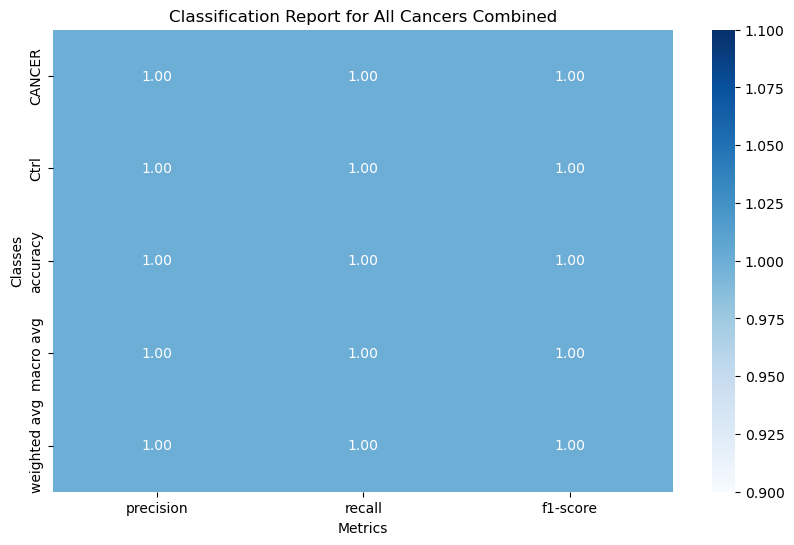

In [28]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for easier plotting
report_df = pd.DataFrame(report)

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report for All Cancers Combined')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.savefig('Classification_Report_AllCancersCombined.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()

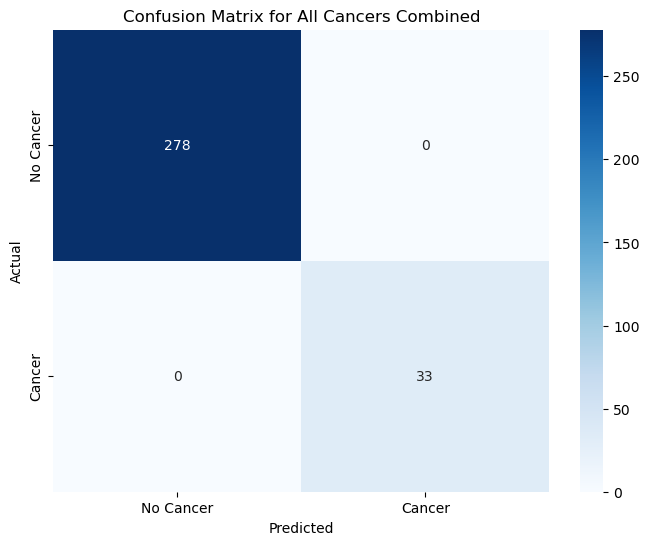

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.title('Confusion Matrix for All Cancers Combined')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion_Matrix_AllCancersCombined.png', format='png', dpi=300)  # Adjust dpi for resolution
plt.show()